## Derive the Equations for Offset Points for the Nose Cone

In [1]:
# Nosecone Parametric Equations
#
# .. todo:: Add shoulder equations.
# .. todo:: Convert to take an input equation, calculate points, 
#    and then offset those points. This should work for 
#    custom transitions as long as a parametric equation can be 
#    created for the outside surface of the transition.
# .. todo:: print equations with math notation.
# .. todo:: Add end-point corrections. See the MATLAB code I 
#    have somewhere on either my laptop, desktop, or work computer?
#
# ..seealso:: mathworld.wolfram.com/ParallelCurves.html
#
# Python 3.7.4
# Created by Andrew Smelser on 1/2/2020
# Version 0.1.0a

import matplotlib.pyplot as plt
from sympy import *
import numpy as np

# Define the symbolic nosecone variables for SymPy
x, f, k, g_dot, f_dot = symbols('x f k gdot fdot')
alpha, beta, gamma = symbols('alpha beta gamma')
y, g = symbols('y g')
t = symbols('t')

# Define the symbolic shoulder variables for SymPy
beta_shoulder = symbols('beta_shoulder')  # Shoulder outer diameter
gamma_shoulder = symbols('gamma_shoulder')  # Shoulder length
k_shoulder = symbols('k_shoulder')  # Shoulder wall thickness

In [2]:
# Outer Surface -- Starting Equations
# Equations for the x and y coordinates (x, y) = (f, g)
# Parameterized by t
f = t
g = (beta/2)*((2*t/gamma) - alpha * pow((t/gamma),2))/(2-alpha)

# Define the derivatives of the x and y coordinate equations
g_dot = diff(g, t)  # dg/dt
f_dot = diff(f, t)  # df/dt

# Define the offset (x, y) coordinate pairs
# based on parallel curve equations from Wolfram alpha
# k = offset distance (i.e. wall thickness)
x = f - k*g_dot / sqrt(f_dot**2 + g_dot**2)
y = g + k*f_dot / sqrt(f_dot**2 + g_dot**2)

In [3]:
# Show the inner and outer surface equations:
# f = x equation for outer surface
# g = y equation for outer surface
# x = x equation for inner surface (offset f point)
# y = y equation for inner surface (offset g point)
#
# Plot as: inner_curve = plot(x, y)
# Plot as: outer_curve = plot(f, g)
#
# Replace all sqrt() calls with np.sqrt()

print(f'{f}\n')  # x equation for outer surface
print(f'{g}\n')  # y equation for outer surface
print(f'{x}\n')  # x equation for inner surface
print(f'{y}\n')  # y equation for inner surface

t

beta*(-alpha*t**2/gamma**2 + 2*t/gamma)/(2*(2 - alpha))

-beta*k*(-2*alpha*t/gamma**2 + 2/gamma)/(2*(2 - alpha)*sqrt(beta**2*(-2*alpha*t/gamma**2 + 2/gamma)**2/(4*(2 - alpha)**2) + 1)) + t

beta*(-alpha*t**2/gamma**2 + 2*t/gamma)/(2*(2 - alpha)) + k/sqrt(beta**2*(-2*alpha*t/gamma**2 + 2/gamma)**2/(4*(2 - alpha)**2) + 1)



In [4]:
# Print the equations for copy+paste into OpenSCAD
# Use C-like syntax to comply with OpenSCAD syntax
print_ccode(f)
print('\n')
print_ccode(g)
print('\n')
print_ccode(x)
print('\n')
print_ccode(y)

t


(1.0/2.0)*beta*(-alpha*pow(t, 2)/pow(gamma, 2) + 2*t/gamma)/(2 - alpha)


-1.0/2.0*beta*k*(-2*alpha*t/pow(gamma, 2) + 2/gamma)/((2 - alpha)*sqrt((1.0/4.0)*pow(beta, 2)*pow(-2*alpha*t/pow(gamma, 2) + 2/gamma, 2)/pow(2 - alpha, 2) + 1)) + t


(1.0/2.0)*beta*(-alpha*pow(t, 2)/pow(gamma, 2) + 2*t/gamma)/(2 - alpha) + k/sqrt((1.0/4.0)*pow(beta, 2)*pow(-2*alpha*t/pow(gamma, 2) + 2/gamma, 2)/pow(2 - alpha, 2) + 1)


-----
## Plot Example Points

Shape Parameter, alpha = 1

Aft Nosecone Diameter, beta = 40mm

Nosecone Length, gamma = 20mm

Wall Thickness, k = 1.5mm

In [5]:
# alpha = shape parameter, non-dimensional
# beta = aft nosecone diameter, mm
# gamma = nosecone length, mm
# k = offset distance (wall thickness), mm

xsubs = [(alpha, 1), (beta, 40), (gamma, 20), (k, 1.5)]  # Define replacement values
x = x.subs(xsubs)  # Do the replacements in x

ysubs = [(alpha, 1), (beta, 40), (gamma, 20), (k, 1.5)]
y = y.subs(ysubs)

fsubs = [(alpha, 1), (beta, 40), (gamma, 20), (k, 1.5)]
f = f.subs(fsubs)

gsubs = [(alpha, 1), (beta, 40), (gamma, 20), (k, 1.5)]
g = g.subs(gsubs)

In [6]:
# Sample points, offset 'inside' the outer curve
ff = []
gg = []
xx = []
yy = []
for tt in range(0, 10):
    ff.append(float(f.subs(t, tt)))  # Original x coordinate
    gg.append(float(g.subs(t, tt)))  # Original y coordinate
    xx.append(float(x.subs(t, tt)))  # Offset x coordinate
    yy.append(float(y.subs(t, tt)))  # Offset y coordinate

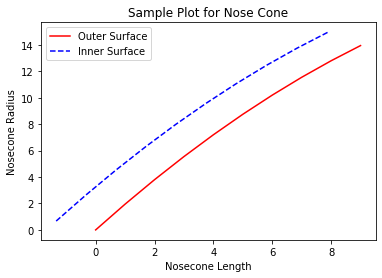

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(ff, gg, 'r-', label='Outer Surface')
plt.plot(xx, yy, 'b--', label='Inner Surface')
ax.set_title('Sample Plot for Nose Cone')
ax.set_xlabel('Nosecone Length')
ax.set_ylabel('Nosecone Radius')
ax.legend(loc='best')

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def x_outer(t, beta, gamma, alpha=1, k=1.5):
    # alpha = shape parameter, non-dimensional
    # beta = aft nosecone diameter, mm
    # gamma = nosecone length, mm
    # k = offset distance (wall thickness), mm
    yout = y_outer(t, alpha, beta, gamma)
    xin = x_inner(t, alpha, beta, gamma, k)
    yin = y_inner(t, alpha, beta, gamma, k)
    xout = t
    return [xout, yout, xin, yin]

def y_outer(t, alpha, beta, gamma):
    return beta*(-alpha*t**2/gamma**2 + 2*t/gamma)/(2*(2 - alpha))

def x_inner(t, alpha, beta, gamma, k):
    return -beta*k*(-2*alpha*t/gamma**2 + 2/gamma)/(2*(2 - alpha)*np.sqrt(beta**2*(-2*alpha*t/gamma**2 + 2/gamma)**2/(4*(2 - alpha)**2) + 1)) + t

def y_inner(t, alpha, beta, gamma, k):
    return beta*(-alpha*t**2/gamma**2 + 2*t/gamma)/(2*(2 - alpha)) + k/np.sqrt(beta**2*(-2*alpha*t/gamma**2 + 2/gamma)**2/(4*(2 - alpha)**2) + 1)

def example_plot(alpha=1, beta=40, gamma=20, k=1.5):
    beta = 40
    gamma = 20
    k = 1.5
    alpha = 1
    xo = []
    yo = []
    xi = []
    yi = []

    for x in range(0, gamma):
        curve_points = x_outer(t=x, beta=beta, gamma=gamma, alpha=alpha, k=k)
        xo.append(curve_points[0])
        yo.append(curve_points[1])
        xi.append(curve_points[2])
        yi.append(curve_points[3])
    fig = plt.figure()
    fig.add_subplot(1, 1, 1)
    plt.plot(xo, yo, 'r-', label='Outer Surface')
    plt.plot(xi, yi, 'b--', label='Inner Surface')